In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from statsmodels import stats
import scipy as sp
import scipy.stats.distributions as dist
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics 

import statsmodels.stats.api as sms

## Cleaning Data & Making New Functions & Adding New Columns to Wordle DataSet

In [2]:
#cleaing original wordle data set

wordle = pd.read_excel('Problem_C_Data_Wordle.xlsx', header=1)
wordle.drop(columns=wordle.columns[0], axis=1, inplace=True)
wordle = wordle.sort_values(by='Date').reset_index()
wordle.drop(columns=wordle.columns[0], axis=1, inplace=True)
wordle['Word'] = wordle.apply(lambda row: row["Word"].replace('ï', 'i'), axis = 1)
wordle

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,9,1
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,14,2
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,22,4
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,17,2
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1


In [3]:
# calculating average number of tries for each word

weighted = wordle['1 try'] + wordle['2 tries']*2 + wordle['3 tries']*3 + wordle['4 tries']*4 + wordle['5 tries']*5 + wordle['6 tries']*6 + wordle['7 or more tries (X)']*7
wordle['Average Tries'] = weighted / 100
wordle

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Average Tries
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,9,1,4.13
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,14,2,4.22
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,22,4,4.64
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,17,2,4.43
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,5,1,3.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3,4.45
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1,4.15
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2,4.40
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1,4.14


In [4]:
# calculating the percentage of plays in hard mode for each word

wordle['Hard Mode Percentage'] = wordle['Number in hard mode'] / wordle['Number of  reported results']
wordle

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Average Tries,Hard Mode Percentage
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,9,1,4.13,0.016892
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,14,2,4.22,0.017369
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,22,4,4.64,0.020912
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,17,2,4.43,0.020927
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,5,1,3.77,0.019606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3,4.45,0.096365
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1,4.15,0.096081
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2,4.40,0.095945
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1,4.14,0.093048


In [5]:
def max_repeated_letters(word):
    count = []
    for i in range(len(word)):
        count.append(word.count(word[i]))
    if max(count) == 1:
        return 0
    return max(count)

print(max_repeated_letters("train"))
print(max_repeated_letters("eerie"))


0
3


In [6]:
def max_repeated_char(word):
    count = []
    for i in range(len(word)):
        count.append(word.count(word[i]))
    if max(count) == 1:
        return ''
    return word[count.index(max(count))]

print(max_repeated_char("train"))
print(max_repeated_char("eerie"))


e


In [7]:
#From Kaera
def vowel_count(word):
    count = 0
    count = word.count('a') + word.count('e') + word.count('i') + word.count('o') + word.count('u')
    return count

# Allison
def vowel_bool(word):
    if vowel_count(max_repeated_char(word)) != 0:
        return True
    return False

In [10]:
print(vowel_count('eerie'), max_repeated_char('eerie'), max_repeated_letters('eerie'), vowel_bool('eerie'))
print(vowel_count('train'), max_repeated_char('train'), max_repeated_letters('train'), vowel_bool('train'))

4 e 3 True
2  0 False


In [8]:
wordle["Max Repeated Letters"] = wordle.apply(lambda row: max_repeated_letters(row["Word"]), axis = 1)
wordle["Max Repeated Char"] = wordle.apply(lambda row: max_repeated_char(row["Word"]), axis = 1)
wordle["Vowel Count"] = wordle.apply(lambda row: vowel_count(row["Word"]), axis = 1)
wordle["Vowel Bool"] = wordle.apply(lambda row: vowel_bool(row["Word"]), axis = 1)

wordle

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Average Tries,Hard Mode Percentage,Max Repeated Letters,Max Repeated Char,Vowel Count,Vowel Bool
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,9,1,4.13,0.016892,0,,1,False
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,14,2,4.22,0.017369,0,,1,False
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,22,4,4.64,0.020912,2,g,2,False
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,17,2,4.43,0.020927,0,,2,False
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,5,1,3.77,0.019606,0,,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3,4.45,0.096365,2,o,2,True
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1,4.15,0.096081,0,,2,False
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2,4.40,0.095945,0,,2,False
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1,4.14,0.093048,0,,2,False


## Exploratory Data Analysis
I conducted an exploratory data analysis the wordle dataset, trying to find potential correlations between word attributes and the average number of tries it took for players to guess those words. The main word attributes I looked at were:
- maximum number of letters repeated within a word
- if that repeated is a vowel or not

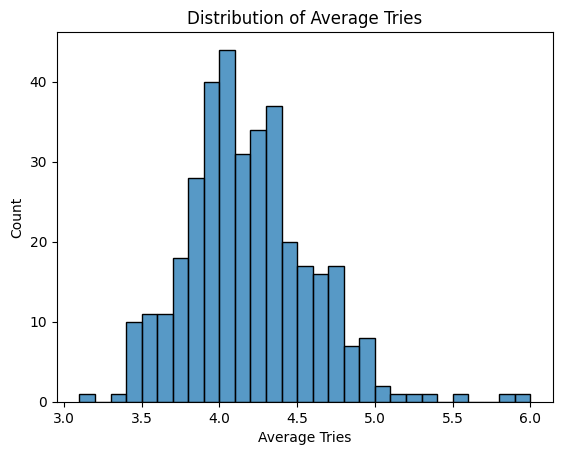

In [11]:
sns.histplot(wordle, x='Average Tries', binwidth=0.1)
plt.title("Distribution of Average Tries")
plt.show()

In [12]:
# sns.displot(wordle, x='Max Repeated Letters', bins=[0, 2, 3, 4])
# plt.title("Distribution of Average Tries")
# plt.show()

wordle['Max Repeated Letters'].value_counts()

0    258
2     99
3      2
Name: Max Repeated Letters, dtype: int64

In [13]:
#hardest word to guess (highest percentage of players not being able to successfully guess the word)

wordle[wordle['7 or more tries (X)'] == wordle['7 or more tries (X)'].max()]

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Average Tries,Hard Mode Percentage,Max Repeated Letters,Max Repeated Char,Vowel Count,Vowel Bool
252,2022-09-16,454,parer,37309,4130,0,0,4,11,15,22,48,5.99,0.110697,2,r,2,False


In [14]:
#easiest word to guess (most 1 try success)

wordle[wordle['1 try'] == wordle['1 try'].max()]

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Average Tries,Hard Mode Percentage,Max Repeated Letters,Max Repeated Char,Vowel Count,Vowel Bool
117,2022-05-04,319,train,107750,7243,6,26,32,22,10,3,0,3.10,0.067220,0,,2,False
346,2022-12-19,548,slate,26010,2422,6,14,33,27,13,5,1,3.43,0.093118,0,,2,False


### Repeated Letters EDA

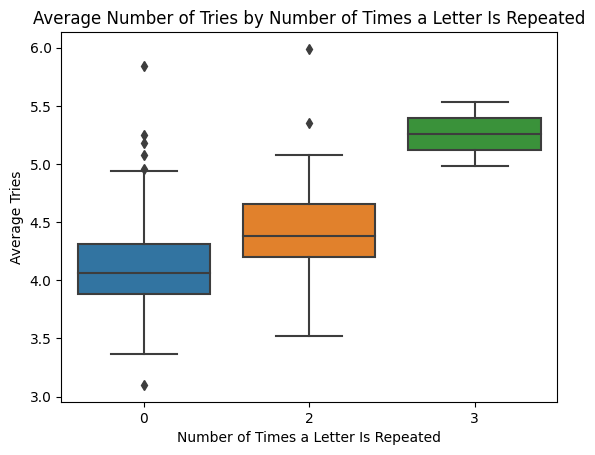

In [15]:
# comparing the average tries with different numbers of letter repeated

sns.boxplot(wordle, x='Max Repeated Letters', y='Average Tries')
plt.title('Average Number of Tries by Number of Times a Letter Is Repeated')
plt.xlabel('Number of Times a Letter Is Repeated')
plt.show()

The median of average tries increased as the maximum number of letters repeated increased.

In [16]:
print((wordle[wordle['Max Repeated Letters'] == 0]['Average Tries']).mean(), (wordle[wordle['Max Repeated Letters'] == 0]['Average Tries']).std())

4.099263565891474 0.3693740634441075


In the following three graphs, I graphed the distribution of average tries with no repeated letters, maximum 2 letters repeated, and maximum 3 letters repeated.

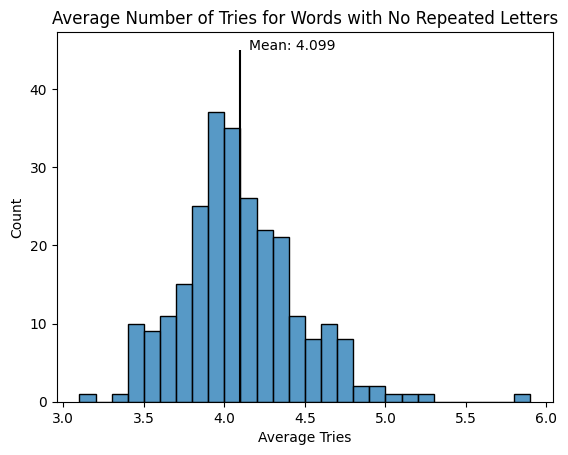

In [17]:
sns.histplot(wordle[wordle['Max Repeated Letters'] == 0]['Average Tries'], binwidth=0.1)
plt.title('Average Number of Tries for Words with No Repeated Letters')
plt.vlines(x = (wordle[wordle['Max Repeated Letters'] == 0]['Average Tries']).mean(), ymin=0, ymax=45, colors='black')
plt.text(x=4.15, y=45, s='Mean: 4.099')
plt.show()

In [18]:
print((wordle[wordle['Max Repeated Letters'] == 2]['Average Tries']).mean(), (wordle[wordle['Max Repeated Letters'] == 2]['Average Tries']).std())

4.413434343434343 0.3750242485116908


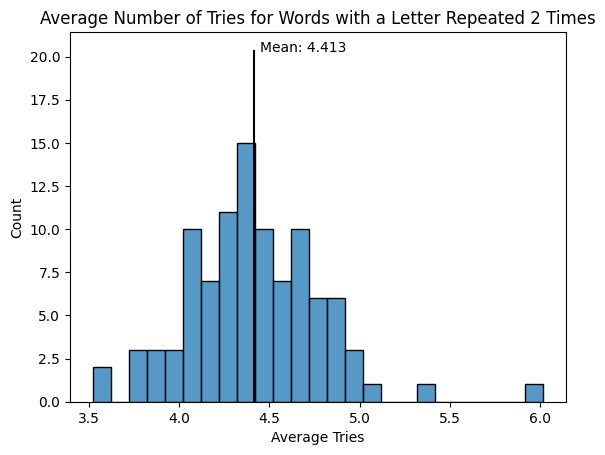

In [19]:
sns.histplot(wordle[wordle['Max Repeated Letters'] == 2]['Average Tries'], binwidth=0.1)
plt.title('Average Number of Tries for Words with a Letter Repeated 2 Times')
plt.vlines(x = (wordle[wordle['Max Repeated Letters'] == 2]['Average Tries']).mean(), ymin=0, ymax=20.4, colors='black')
plt.text(x=4.45, y=20.3, s='Mean: 4.413')
plt.show()

In [12]:
print((wordle[wordle['Max Repeated Letters'] == 3]['Average Tries']).mean(), (wordle[wordle['Max Repeated Letters'] == 3]['Average Tries']).std())

5.255000000000001 0.388908729652601


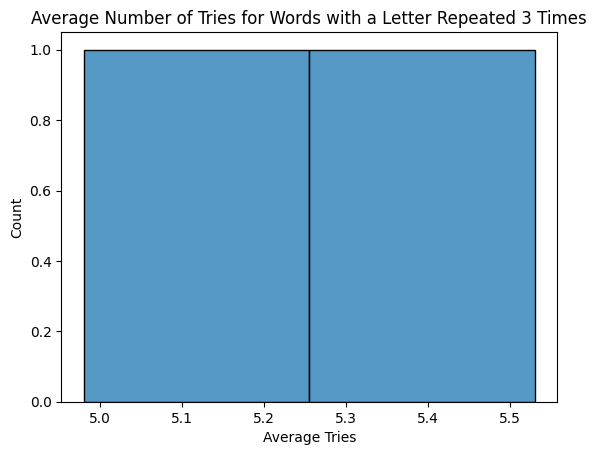

In [20]:
sns.histplot(wordle[wordle['Max Repeated Letters'] == 3]['Average Tries'])
plt.title('Average Number of Tries for Words with a Letter Repeated 3 Times')
plt.show()

<Axes: xlabel='Average Tries', ylabel='Hard Mode Percentage'>

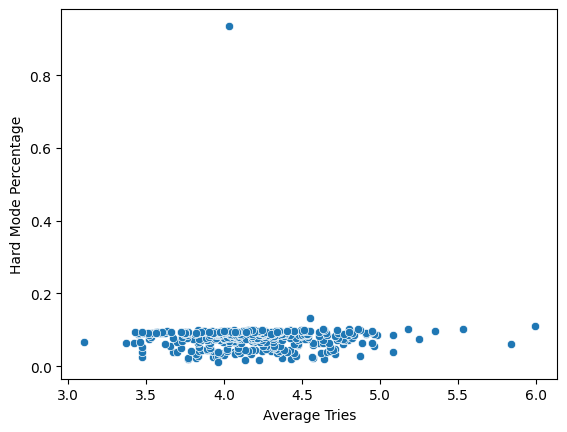

In [21]:
sns.scatterplot(wordle, x='Average Tries', y='Hard Mode Percentage')

<Axes: xlabel='Date', ylabel='Average Tries'>

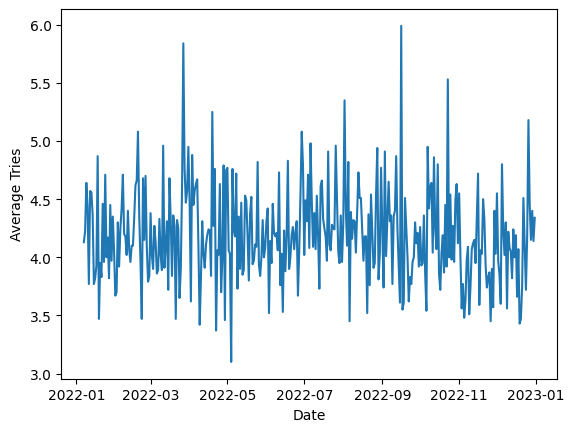

In [22]:
sns.lineplot(wordle, x='Date', y='Average Tries')

### Hard Mode EDA

In [23]:
wordle[wordle['Hard Mode Percentage'] == wordle['Hard Mode Percentage'].max()]

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Average Tries,Hard Mode Percentage,Max Repeated Letters,Max Repeated Char,Vowel Count,Vowel Bool
327,2022-11-30,529,study,2569,2405,0,6,30,33,19,10,2,4.03,0.936162,0,,1,False


<Axes: xlabel='Average Tries', ylabel='Hard Mode Percentage'>

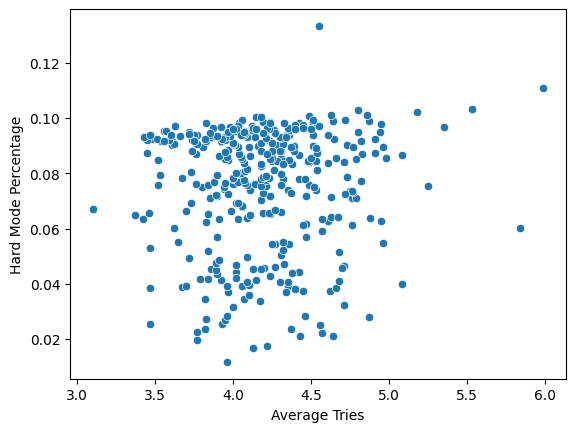

In [24]:
sns.scatterplot(wordle[wordle['Hard Mode Percentage'] < 0.5], x='Average Tries', y='Hard Mode Percentage')

<Axes: xlabel='Date', ylabel='Hard Mode Percentage'>

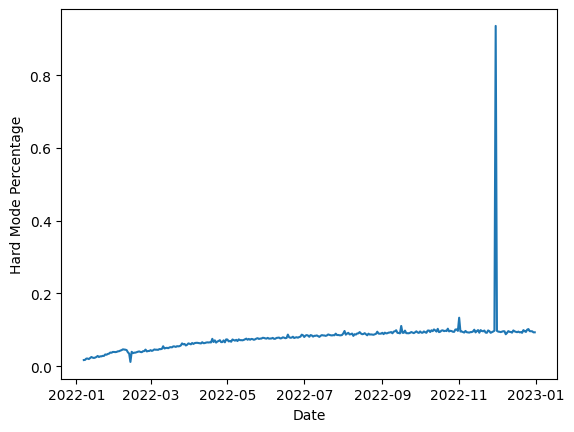

In [25]:
sns.lineplot(wordle, x='Date', y='Hard Mode Percentage')

<Axes: xlabel='Date', ylabel='Hard Mode Percentage'>

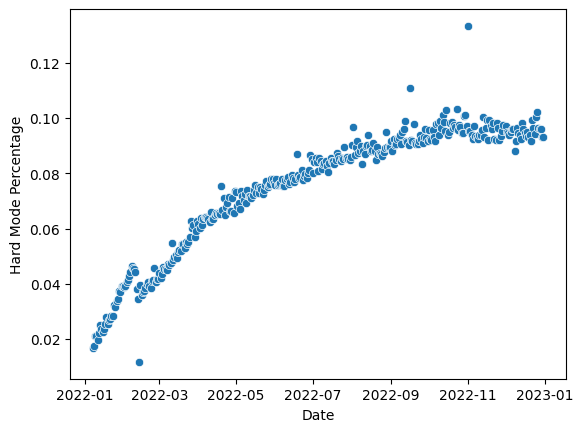

In [26]:
sns.scatterplot(wordle[wordle['Hard Mode Percentage'] < 0.5], x='Date', y='Hard Mode Percentage')
#y=0.1/(1+(C*np.exp(-rt)))

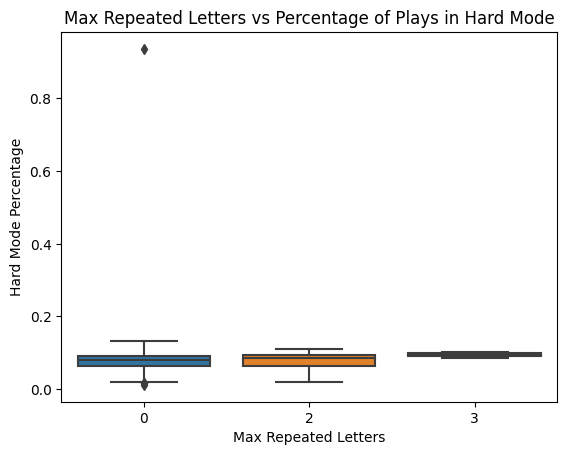

In [27]:
sns.boxplot(wordle, x='Max Repeated Letters', y='Hard Mode Percentage')
plt.title('Max Repeated Letters vs Percentage of Plays in Hard Mode')
plt.show()

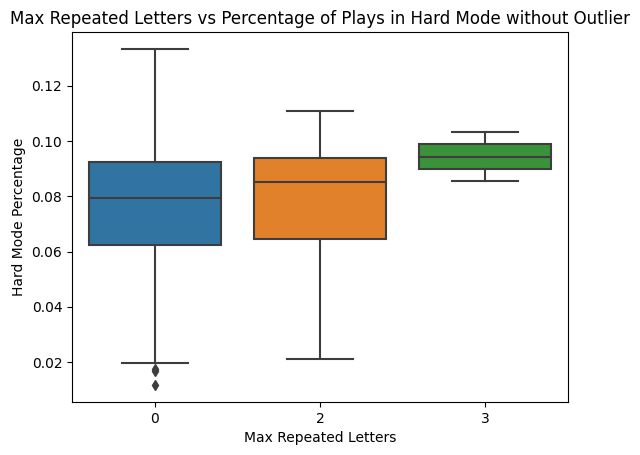

In [28]:
sns.boxplot(wordle[wordle['Hard Mode Percentage'] < 0.5], x='Max Repeated Letters', y='Hard Mode Percentage')
plt.title('Max Repeated Letters vs Percentage of Plays in Hard Mode without Outlier')
plt.show()

### Vowel Count EDA

<Axes: xlabel='Vowel Count', ylabel='Average Tries'>

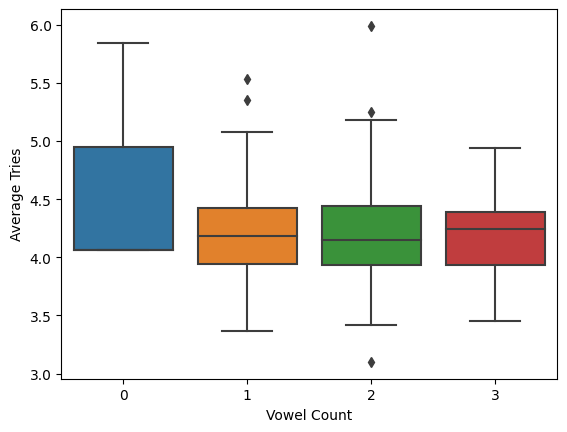

In [29]:
sns.boxplot(wordle, x="Vowel Count", y="Average Tries")

Text(0.5, 0, 'Vowel')

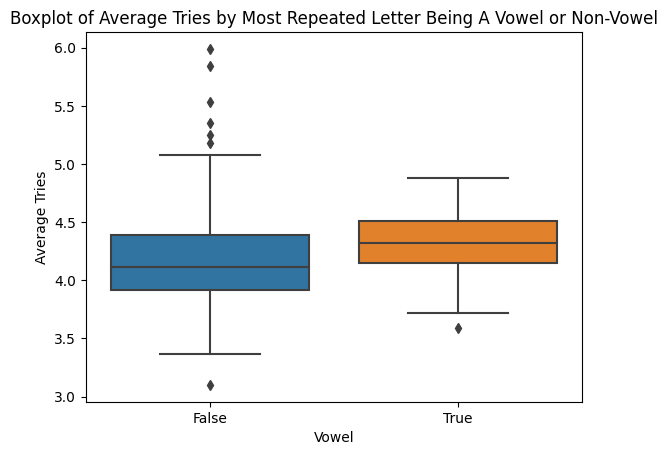

In [30]:
sns.boxplot(wordle, x="Vowel Bool", y="Average Tries")
plt.title("Boxplot of Average Tries by Most Repeated Letter Being A Vowel or Non-Vowel")
plt.xlabel("Vowel")

In [31]:
wordle["Number of  reported results"].mean()

90918.87743732591

In [11]:
print((wordle[wordle['Vowel Bool'] == True]['Average Tries']).mean(), (wordle[wordle['Vowel Bool'] == True]['Average Tries']).std())
print((wordle[wordle['Vowel Bool'] == False]['Average Tries']).mean(), (wordle[wordle['Vowel Bool'] == False]['Average Tries']).std())

4.32695652173913 0.32023511893758033
4.172555910543132 0.4112237649318935


## T-tests verifying differences observed in EDA (seeing if they are signficant or not)

### Maximum number of letters repeated t-tests

In [32]:
# t-test for max repeated letters 0 and 2
n = 5000
size = 30
t_s1 = np.zeros(n)
p_v1 = np.zeros(n)
dfs1 = np.zeros(n)

for i in range(n):
    max_rep_0 = np.random.choice(wordle[wordle["Max Repeated Letters"] == 0]["Average Tries"], size, replace = True)
    max_rep_2 = np.random.choice(wordle[wordle["Max Repeated Letters"] == 2]["Average Tries"], size, replace = True)

    t, p, df1 = stats.weightstats.ttest_ind(max_rep_0, max_rep_2, usevar='unequal')

    t_s1[i] = t
    p_v1[i] = p
    dfs1[i] = df1

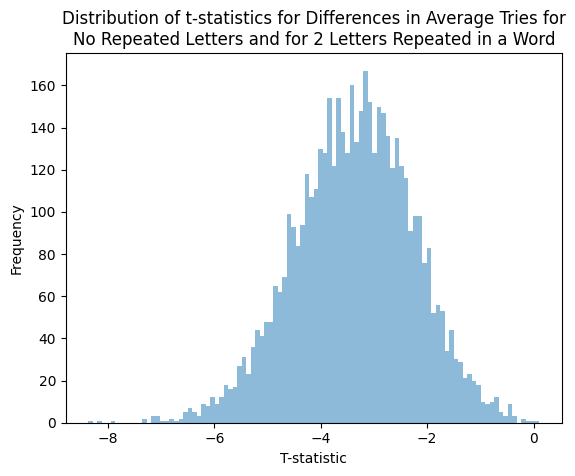

In [33]:
plt.hist(t_s1, bins=100, alpha=0.5)
plt.xlabel('T-statistic')
plt.ylabel('Frequency')
plt.title('Distribution of t-statistics for Differences in Average Tries for\nNo Repeated Letters and for 2 Letters Repeated in a Word')
plt.show()

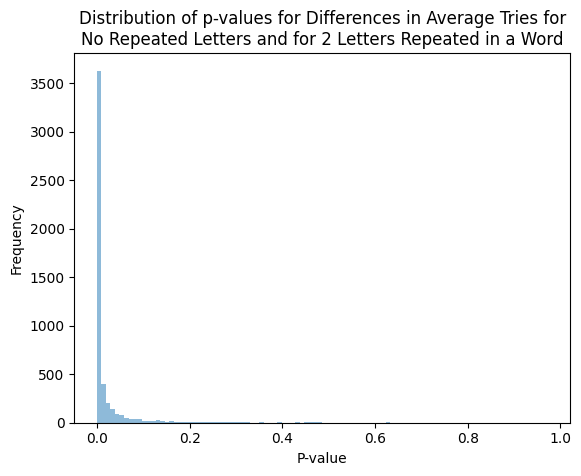

In [52]:
plt.hist(p_v1, bins=100, alpha=0.5)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of p-values for Differences in Average Tries for\nNo Repeated Letters and for 2 Letters Repeated in a Word')
plt.show()

Reject null hypothesis

In [35]:
print(dfs1.mean())
mean_diff_rep0_2 = sms.CompareMeans(sms.DescrStatsW(wordle[wordle["Max Repeated Letters"] == 0]["Average Tries"]),
                 sms.DescrStatsW(wordle[wordle["Max Repeated Letters"] == 2]["Average Tries"]))
mean_diff_rep0_2.tconfint_diff()

55.095419135304724


(-0.40041786184851896, -0.2279236932372209)

Most of the t-values are between -4 and -2.5, showing that there is a signficant difference between the mean average tries for words with no repeated letters and words with 2 repeated letters. The t-test was conducted with a degree of freedom of about 55.095. For 95% of the time, the mean difference between average tries for words with no repeated letters and words with 2 letters repeated would be from -0.400 to -0.228.

In [36]:
# t-test for max repeated letter 0 and 3
n = 5000
size = 30
t_s2 = np.zeros(n)
p_v2 = np.zeros(n)
dfs2 = np.zeros(n)

for i in range(n):
    max_rep_0 = np.random.choice(wordle[wordle["Max Repeated Letters"] == 0]["Average Tries"], size, replace = True)
    max_rep_3 = np.random.choice(wordle[wordle["Max Repeated Letters"] == 3]["Average Tries"], size, replace = True)

    t, p, df2 = stats.weightstats.ttest_ind(max_rep_0, max_rep_3, usevar='unequal')

    t_s2[i] = t
    p_v2[i] = p
    dfs2[i] =df2

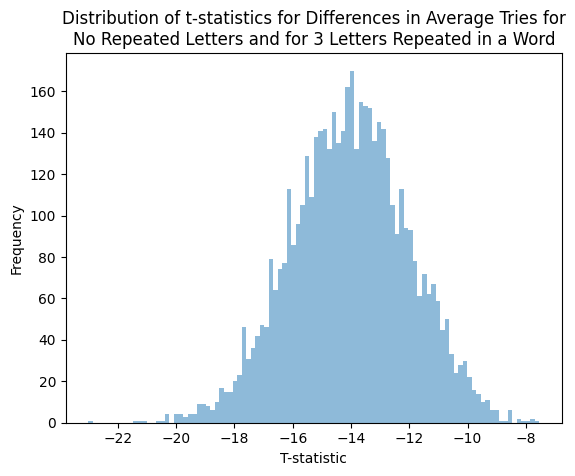

In [53]:
plt.hist(t_s2, bins=100, alpha=0.5)
plt.xlabel('T-statistic')
plt.ylabel('Frequency')
plt.title('Distribution of t-statistics for Differences in Average Tries for\nNo Repeated Letters and for 3 Letters Repeated in a Word')
plt.show()

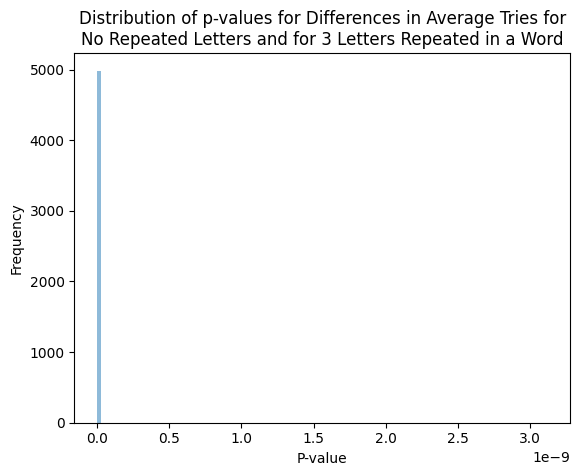

In [54]:
plt.hist(p_v2, bins=100, alpha=0.5)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of p-values for Differences in Average Tries for\nNo Repeated Letters and for 3 Letters Repeated in a Word')
plt.show()

Reject null hypothesis

In [39]:
print(dfs2.mean())
mean_diff_rep0_3 = sms.CompareMeans(sms.DescrStatsW(wordle[wordle["Max Repeated Letters"] == 0]["Average Tries"]),
                 sms.DescrStatsW(wordle[wordle["Max Repeated Letters"] == 3]["Average Tries"]))
mean_diff_rep0_3.tconfint_diff()

53.56675230132277


(-1.6721643511276116, -0.6393085170894424)

Most of the t-values are around -14 to -13, showing that there is a signficant difference between the mean average tries for words with no repeated letters and words with 3 repeated letters. The t-test was conducted with a mean degrees of freedom of about 53.567. For 95% of the time, the mean difference between average tries for words with no repeated letters and words with 3 repeated letters would be from -1.672 to -0.639. This shows that the mean difference between average tries for words with no repeated letters and those with 3 letters repeated is larger than that of average tries for words with no repeated letters and those with 2 letters repeated.

In [40]:
# t-test for max repeated letters
n = 5000
size = 30
t_s3 = np.zeros(n)
p_v3 = np.zeros(n)
dfs3 = np.zeros(n)

for i in range(n):
    max_rep_2 = np.random.choice(wordle[wordle["Max Repeated Letters"] == 2]["Average Tries"], size, replace = True)
    max_rep_3 = np.random.choice(wordle[wordle["Max Repeated Letters"] == 3]["Average Tries"], size, replace = True)

    t, p, df3 = stats.weightstats.ttest_ind(max_rep_2, max_rep_3, usevar='unequal')

    t_s3[i] = t
    p_v3[i] = p
    dfs3[i] = df3

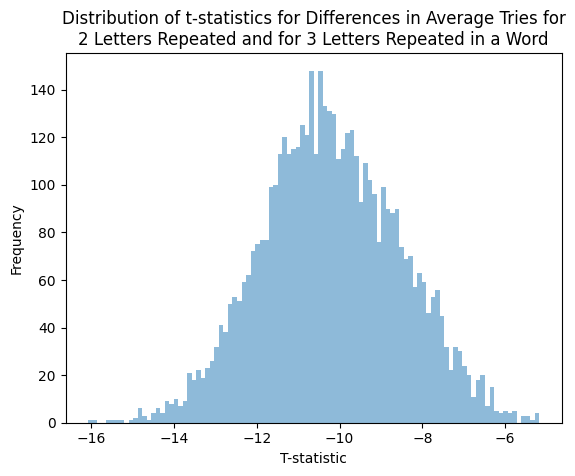

In [41]:
plt.hist(t_s3, bins=100, alpha=0.5)
plt.xlabel('T-statistic')
plt.ylabel('Frequency')
plt.title('Distribution of t-statistics for Differences in Average Tries for\n2 Letters Repeated and for 3 Letters Repeated in a Word')
plt.show()

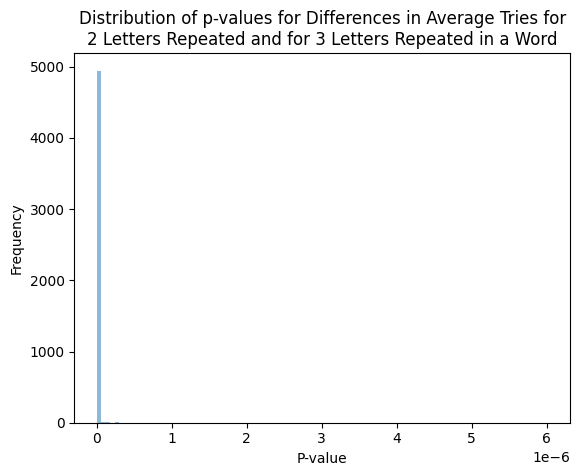

In [42]:
plt.hist(p_v3, bins=100, alpha=0.5)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of p-values for Differences in Average Tries for\n2 Letters Repeated and for 3 Letters Repeated in a Word')
plt.show()

Reject null hypothesis

In [43]:
print(dfs3.mean())
mean_diff_rep2_3 = sms.CompareMeans(sms.DescrStatsW(wordle[wordle["Max Repeated Letters"] == 2]["Average Tries"]),
                 sms.DescrStatsW(wordle[wordle["Max Repeated Letters"] == 3]["Average Tries"]))
mean_diff_rep2_3.tconfint_diff()

53.411876599806526


(-1.3732354084038418, -0.3098959047274723)

Most of the t-values are centered around -10, showing that there is a signficant difference between the mean average tries for words with 2 letters repeated and words with 3 repeated letters. The t-test was conducted with a mean degree of freedom of about 53.326. For 95% of the time, the mean difference between average tries for words with 2 letters repeated and words with 3 letters repeated would be approximately from -1.373 to -0.310. This shows that the mean difference between average tries for words with 2 letters repeated and those with 3 letters repeated is larger than that of average tries for words with no repeated letters and those with 2 repeated letters, but smaller than the mean difference between words with no repeated letters and those with 3 repeated letters.

This shows that as the maximum number of letters repeated increases, then the average number of tries to successfully guess the word increases. Moreover, that the differences in average number of tries are significant.

### If maximum number of letters repeated is a vowel or not t-test

In [44]:
# t-test for true false vowel bool

n = 5000
size = 30
t_s4 = np.zeros(n)
p_v4 = np.zeros(n)
dfs4 = np.zeros(n)

for i in range(n):
    yes_vowel = np.random.choice(wordle[wordle["Vowel Bool"] == True]["Average Tries"], size, replace = True)
    no_vowel = np.random.choice(wordle[wordle["Vowel Bool"] == False]["Average Tries"], size, replace = True)

    t, p, df4 = stats.weightstats.ttest_ind(yes_vowel, no_vowel, usevar='unequal')

    t_s4[i] = t
    p_v4[i] = p
    dfs4[i] = df4

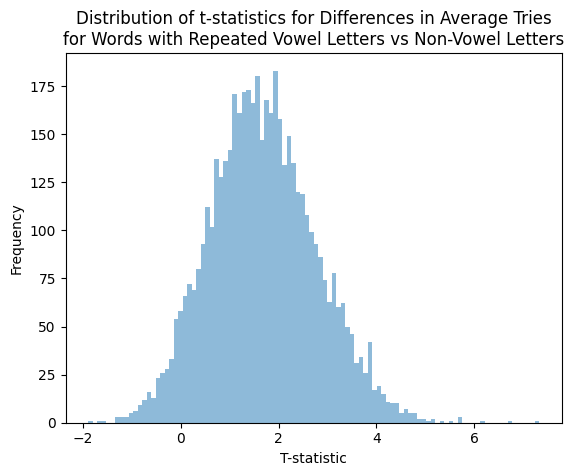

In [45]:
plt.hist(t_s4, bins=100, alpha=0.5)
plt.xlabel('T-statistic')
plt.ylabel('Frequency')
plt.title('Distribution of t-statistics for Differences in Average Tries\nfor Words with Repeated Vowel Letters vs Non-Vowel Letters')
plt.show()

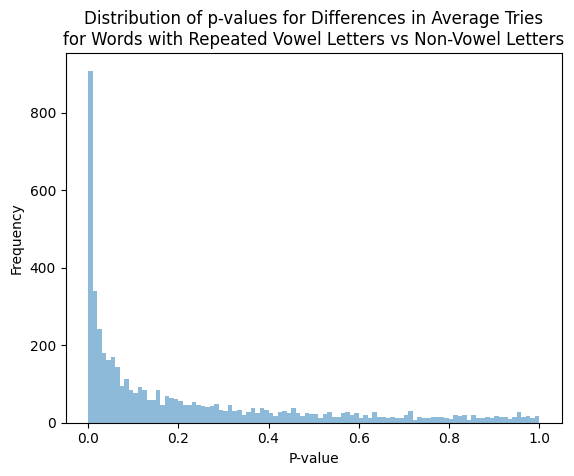

In [46]:
plt.hist(p_v4, bins=100, alpha=0.5)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of p-values for Differences in Average Tries\nfor Words with Repeated Vowel Letters vs Non-Vowel Letters')
plt.show()

In [47]:
len(p_v4[p_v4 <= 0.5]) / 5000

0.8328

Reject null hypothesis

In [48]:
print(dfs4.mean())
mean_diff_vowel_rep = sms.CompareMeans(sms.DescrStatsW(wordle[wordle["Vowel Bool"] == True]["Average Tries"]),
                 sms.DescrStatsW(wordle[wordle["Vowel Bool"] == False]["Average Tries"]))
mean_diff_vowel_rep.tconfint_diff()

53.59565367993433


(0.029906643184527265, 0.2788945792074716)

Most of the t-values are around 1.5 to 2, showing that there is a signficant difference between the mean average tries for words with their maximum repeated letter to be a vowel versus words with a maximum repeated letter being a non-vowel character. The t-test was conducted with a mean degree of freedom of about 53.575. For 95% of the time, the mean difference between average tries for words their maximum repeated character being a vowel and words with a maximum repeated character not being a vowel would be approximately between 0.0299 to 0.2789. This means that for 95% of the time, the average number of tries to guess a word with their maximum repeated character being a vowel is 0.0299 to 0.2789 tries more than those who don't have a maximum repeated character being a vowel.

## Brainstorming/Potential Functions for Modeling Difficulty

In [49]:
rep_letter_stats = [[0, (wordle[wordle['Max Repeated Letters'] == 0]['Average Tries']).mean(), (wordle[wordle['Max Repeated Letters'] == 0]['Average Tries']).std()], 
                 [2, (wordle[wordle['Max Repeated Letters'] == 2]['Average Tries']).mean(), (wordle[wordle['Max Repeated Letters'] == 2]['Average Tries']).std()],
                 [3, (wordle[wordle['Max Repeated Letters'] == 3]['Average Tries']).mean(), (wordle[wordle['Max Repeated Letters'] == 3]['Average Tries']).std()]]
rep_letter_df = pd.DataFrame(rep_letter_stats, columns=['Max Repeated Letters', 'Mean Average Tries', 'SD Average Tries'])
rep_letter_df

,Max Repeated Letters,Mean Average Tries,SD Average Tries
0,0,4.099264,0.369374
1,2,4.413434,0.375024
2,3,5.255000,0.388909


5.261991765403476

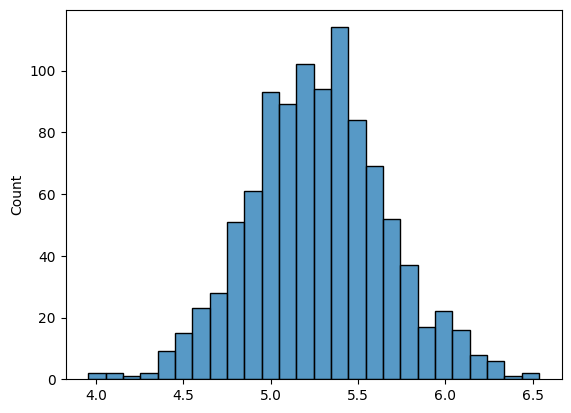

In [50]:
def plot_avg_try(word):
    if max_repeated_letters(word) == 0:
        result = np.random.normal(4.099264, 0.369374, 1000)
    elif max_repeated_letters(word) == 2:
        result = np.random.normal(4.413434, 0.375024, 1000)
    elif max_repeated_letters(word) == 3:
        result = np.random.normal(5.255000, 0.388909, 1000)
    return sns.histplot(result)

def avg_try(word):
    if max_repeated_letters(word) == 0:
        result = np.random.normal(4.099264, 0.369374, 1000)
    elif max_repeated_letters(word) == 2:
        result = np.random.normal(4.413434, 0.375024, 1000)
    elif max_repeated_letters(word) == 3:
        result = np.random.normal(5.255000, 0.388909, 1000)
    return result.mean()

plot_avg_try('eerie')
avg_try('eerie')


4.08220423735972

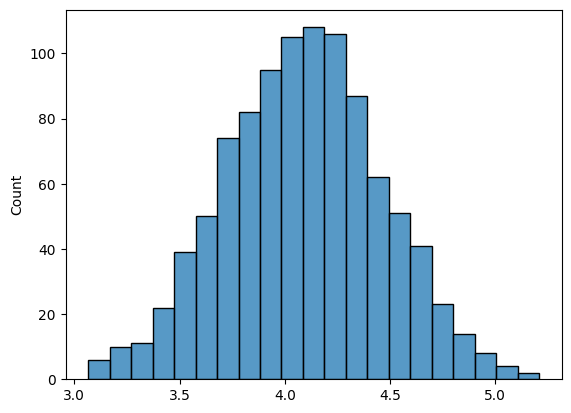

In [51]:
plot_avg_try('study')
avg_try('study')